# Fuel Consumption Ratings 2023
Fuel consumption ratings and estimated carbon dioxide emissions for new vehicles.

The dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. To compare vehicles from different model years, the fuel consumption ratings for 1995 to 2014 vehicles have been adjusted to reflect 5-cycle testing. 

Note that these are approximate values that were generated from the original ratings, not from vehicle testing. 

For more information on fuel consumption testing, visit this [link](https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/fuel-consumption-guide/understanding-fuel-consumption-ratings/fuel-consumption-testing/21008). To compare the fuel consumption information of new and older models to find the most fuel-efficient vehicle that meets your everyday needs, use the fuel consumption ratings search tool at this [link](https://fcr-ccc.nrcan-rncan.gc.ca/en).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
od.download(
    dataset_id_or_url='https://www.kaggle.com/datasets/imtkaggleteam/fuel-concumption-ratings-2023/discussion'
)

Skipping, found downloaded files in "./fuel-concumption-ratings-2023" (use force=True to force download)


In [3]:
df = pd.read_csv(
    filepath_or_buffer='fuel-concumption-ratings-2023/Fuel Consumption Ratings 2023.csv', encoding='latin-1', low_memory=False, dtype={
        'Vehicle Class':'category', 
        'Transmission':'category', 
        'Fuel Type':'category',
        'Smog Rating':'category',
        'CO2 Rating':'category',
    }
)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_(l/100km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   year                        841 non-null    object  
 1   make                        854 non-null    object  
 2   model                       833 non-null    object  
 3   vehicle_class               833 non-null    category
 4   engine_size_(l)             833 non-null    float64 
 5   cylinders                   833 non-null    float64 
 6   transmission                833 non-null    category
 7   fuel_type                   833 non-null    category
 8   fuel_consumption_(l/100km)  833 non-null    float64 
 9   hwy_(l/100_km)              833 non-null    float64 
 10  comb_(l/100_km)             833 non-null    float64 
 11  comb_(mpg)                  833 non-null    float64 
 12  co2_emissions_(g/km)        833 non-null    float64 
 13  co2_rating          

### Data Cleaning

**Handling Missing Values**

The values from index 834 are definition of values from the category and numeric features. 

In [5]:
df.loc[833:]

,year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_(l/100km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,Understanding the table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,SWB = Short wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,LWB = Long wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,NaN,EWB = Extended wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,Transmission,A = automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,NaN,AM = automated manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
popped_row = df.iloc[833:]
df = df.drop(df.index[833:])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   year                        833 non-null    object  
 1   make                        833 non-null    object  
 2   model                       833 non-null    object  
 3   vehicle_class               833 non-null    category
 4   engine_size_(l)             833 non-null    float64 
 5   cylinders                   833 non-null    float64 
 6   transmission                833 non-null    category
 7   fuel_type                   833 non-null    category
 8   fuel_consumption_(l/100km)  833 non-null    float64 
 9   hwy_(l/100_km)              833 non-null    float64 
 10  comb_(l/100_km)             833 non-null    float64 
 11  comb_(mpg)                  833 non-null    float64 
 12  co2_emissions_(g/km)        833 non-null    float64 
 13  co2_rating          

In [7]:
df_exp = popped_row.iloc[2:][['year', 'make']]
df_exp.loc[836:841, 'year'] = 'Model'
df_exp.loc[841:, 'year'] = 'Transmission'
df_exp = df_exp.pivot(columns='year', values='make').reset_index(drop=True)

df_exp

year,Model,Transmission
0,4WD/4X4 = Four-wheel drive,NaN
1,AWD = All-wheel drive,NaN
2,FFV = Flexible-fuel vehicle,NaN
3,SWB = Short wheelbase,NaN
4,LWB = Long wheelbase,NaN
5,EWB = Extended wheelbase,NaN
6,NaN,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [8]:
df['year'] = df.year.astype(int)

### Exploratory Analysis

In [9]:
df.head()

,year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_(l/100km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4,5


In [10]:
df.describe(include='all')

,year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_(l/100km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
count,833.0,833,833,833,833.000000,833.000000,833,833,833.000000,833.000000,833.000000,833.000000,833.000000,833,833
unique,NaN,39,657,14,NaN,NaN,23,4,NaN,NaN,NaN,NaN,NaN,9,6
top,NaN,Ford,Mustang,SUV: Small,NaN,NaN,AS8,Z,NaN,NaN,NaN,NaN,NaN,5,5
freq,NaN,93,5,195,NaN,NaN,199,408,NaN,NaN,NaN,NaN,NaN,266,282
mean,2023.0,NaN,NaN,NaN,3.147899,5.627851,NaN,NaN,12.431453,9.353661,11.047179,27.375750,257.471789,NaN,NaN
std,0.0,NaN,NaN,NaN,1.353076,1.968695,NaN,NaN,3.456191,2.302312,2.878308,7.559968,64.262847,NaN,NaN
min,2023.0,NaN,NaN,NaN,1.200000,3.000000,NaN,NaN,4.400000,4.400000,4.400000,11.000000,104.000000,NaN,NaN
25%,2023.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.700000,9.000000,22.000000,211.000000,NaN,NaN
50%,2023.0,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.100000,9.100000,10.700000,26.000000,254.000000,NaN,NaN
75%,2023.0,NaN,NaN,NaN,3.600000,6.000000,NaN,NaN,14.600000,10.700000,12.900000,31.000000,299.000000,NaN,NaN


**Color Palette Tests**

In [11]:
deep_colors = [
    '#4C72B0', '#55A868', '#C44E52',
    '#8172B2', '#CCB974', '#64B5CD'
]

sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

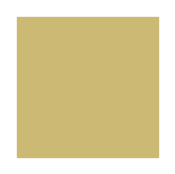

In [12]:
plt.figure(figsize=(2, 2))
plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=deep_colors[4])
plt.axis('off')
plt.show()

**Categorical Variables & Fuel Consumption**

In [13]:
count_data = df.groupby('make').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='make', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

count_data

,make,fuel_consumption_(l/100km)
32,Bugatti,29.133333
4,Rolls-Royce,20.042857
16,Lamborghini,17.600000
33,Bentley,17.533333
27,Dodge,15.804348
36,Aston Martin,15.514286
11,Maserati,14.652941
5,Ram,14.590909
24,GMC,14.230556
29,Chevrolet,13.854545


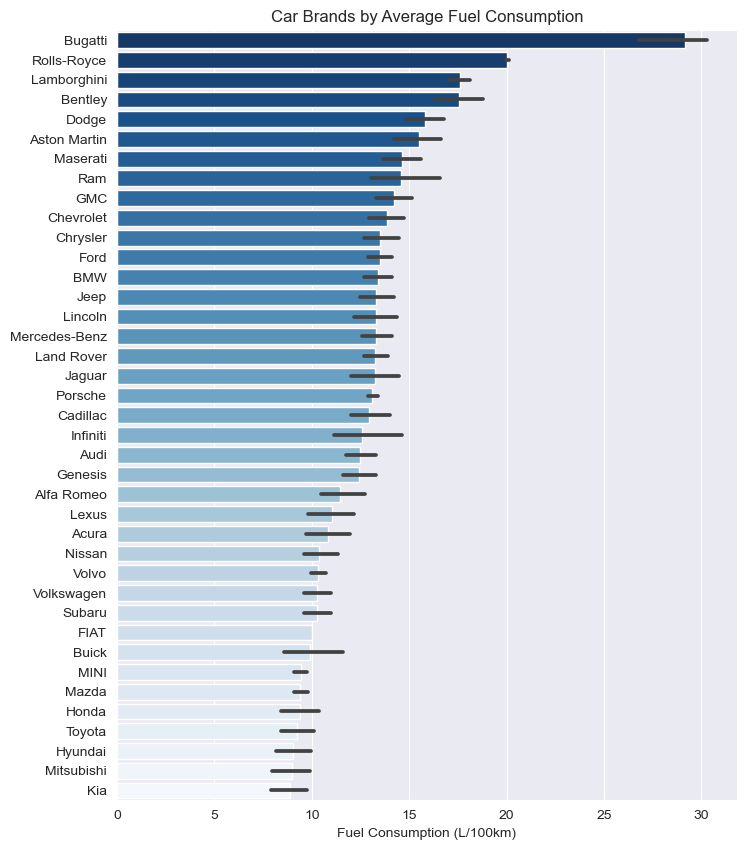

In [14]:
plt.figure(figsize=(8, 10))
sns.set_style("darkgrid")
custom_palette = sns.color_palette("Blues_r", n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='make',
    x='fuel_consumption_(l/100km)', 
    orient='h',
    order=count_data.make,
)
plt.ylabel('')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Car Brands by Average Fuel Consumption')
plt.show()

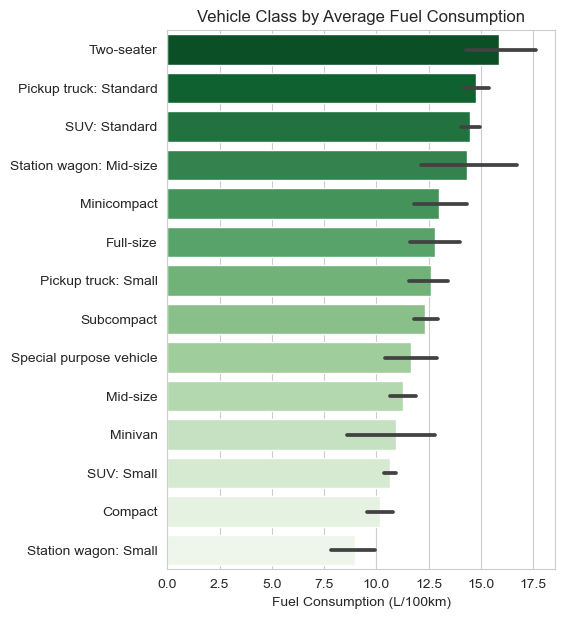

In [15]:
count_data = df.groupby('vehicle_class').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='vehicle_class', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 7))
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Greens_r", n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='vehicle_class',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.vehicle_class,
)
plt.ylabel('')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Vehicle Class by Average Fuel Consumption')
plt.show()

On average, the highest fuel consumption are by 2-seater cars. This may be related to the fact that Bugattis & Lamborghinis are the highest fuel consumption brands, and they are 2-seater cars.

Let's test this Chi-square & Cramer's V.

_Chi-Square Test of Independence_ can be used to assess whether there is an association between two categorical variables. It tests whether the observed frequency distribution of the two variables differs from what would be expected if they were independent. 

In [16]:
# Create a contingency table
contingency_table = pd.crosstab(
    df.make, df.vehicle_class
)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 1971.3759088338834
P-value: 3.7780092906945796e-175


The chi-square stat is large, and the p-value is within the range of statistical significance. This implies an association between the 2 variables, i.e., they are not independent. This confirms our initial hypothesis.

_Cramér's V_ is a measure of association for categorical variables. It is based on the Chi-Square statistic and provides a value between 0 and 1, where 0 indicates no association, and 1 indicates a strong association.

In [17]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)

    # Calculate Cramér's V
    cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

    # Calculate the degrees of freedom for the chi-squared test
    dof = (r - 1) * (k - 1)

    # Calculate the p-value using the chi-squared distribution
    p_value = chi2_contingency(confusion_matrix)[1]

    return cramers_v, p_value

In [18]:
cramers_v, p_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v)
print("P-value:", p_value)

Cramer's V: 0.3722063292404431
P-value: 3.7780092906945796e-175


The two variables have a Cramer's V of 0.37 implying a moderate association or correlation between them.

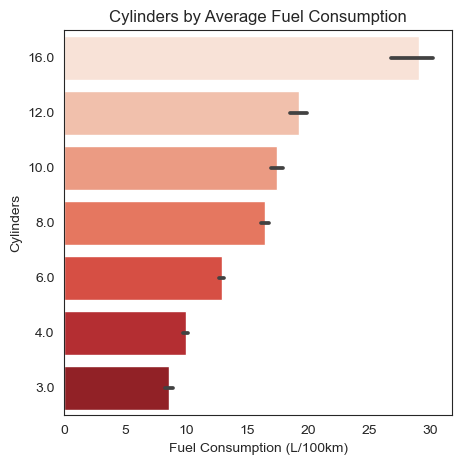

In [19]:
count_data = df.groupby('cylinders').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='cylinders', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 5))
sns.set_style("white")
custom_palette = sns.color_palette('Reds', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='cylinders',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.cylinders,
)
plt.ylabel('Cylinders')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Cylinders by Average Fuel Consumption')
plt.show()

This plot implies a positive correlation between cylinders and fuel consumption. We can confirm this using pearson correlation:

In [20]:
df[['cylinders', 'fuel_consumption_(l/100km)']].corr()

,cylinders,fuel_consumption_(l/100km)
cylinders,1.000000,0.837887
fuel_consumption_(l/100km),0.837887,1.000000


Our alternative hypothesis is confirmed. 

In [21]:
df.transmission.unique()

['AV7', 'M6', 'AS10', 'A8', 'A9', ..., 'AS6', 'AV10', 'M5', 'AS5', 'A7']
Length: 23
Categories (23, object): ['A10', 'A6', 'A7', 'A8', ..., 'AV8', 'M5', 'M6', 'M7']

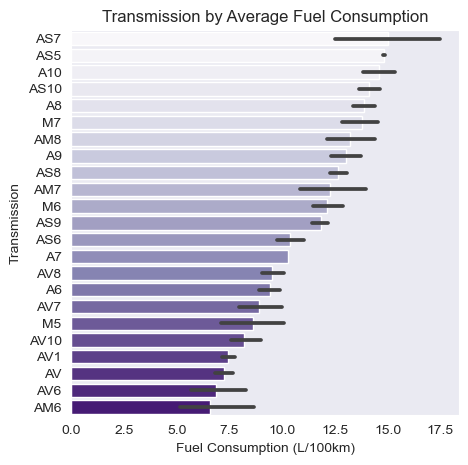

In [22]:
count_data = df.groupby('transmission').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='transmission', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 5))
sns.set_style("dark")
custom_palette = sns.color_palette('Purples', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='transmission',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.transmission,
)
plt.ylabel('Transmission')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Transmission by Average Fuel Consumption')
plt.show()

Transmission translation:

In [23]:
popped_row.loc[841:846, 'make']

841                       A = automatic
842               AM = automated manual
843    AS = automatic with select shift
844          AV = continuously variable
845                          M = manual
846            3  10 = Number of gears
Name: make, dtype: object

The top 5 transmissions with high fuel consumption are automatic. Of those 5, automatic with select shift accounts for 60% (3 out of 5).

On the bottom 5 transmissions by average fuel consumption, 80% (4 out of 5) of the values are continuously variable transmissions. A continuously variable transmission (CVT) is an automated transmission that can change through a continuous range of gear ratios.

This implies that CVTs are the most fuel efficient transmission systems. Let's test this using a box plot and ANOVA:

_Box plots_ (box-and-whisker plots) are useful for visualizing the distribution of a numeric variable for different categories of a categorical variable. They show the median, quartiles, and potential outliers for each category. This helps us understand the central tendency and spread of the numeric variable within each category.

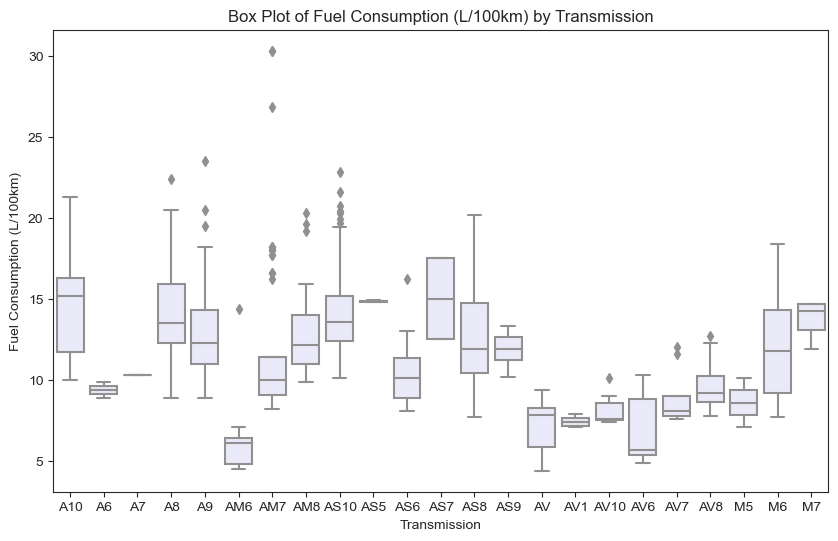

In [24]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.boxplot(
    x='transmission', y='fuel_consumption_(l/100km)', data=df, color='lavender'
)

plt.xlabel('Transmission')
plt.ylabel('Fuel Consumption (L/100km)')
plt.title('Box Plot of Fuel Consumption (L/100km) by Transmission')

plt.show()

_ANOVA_ is a statistical test used to determine whether there are significant differences in the means of a numeric variable across different levels or categories of a categorical variable. It assesses the impact of the categorical variable on the numeric variable.

In [25]:
from scipy.stats import f_oneway

# Separate the numeric values into different groups based on the categories
groups = [df['fuel_consumption_(l/100km)'][df['transmission'] == category] for category in df['transmission'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:  # Use a significance level (alpha) of 0.05
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")


F-statistic: 18.359189016086443
P-value: 4.5510263997966704e-57
There is a significant difference between the categories.


The ANOVA test results imply that there are significant differences among the different transmissions when grouped by fuel consumption. In other words, `transmission` has a significant effect on `fuel consumption`. 

In conclusion, there is a relationship / association between transmission and fuel consumption. This association is implied in the bar chart, where we see that the highest fuel consumption vehicles have automatic transmission and the lowest are CVT.

When we visualize using a box plot, the portion of the x-axis with CVT (AV) has lower fuel consumption values than the rest. This alternative hypothesis (that there is a relationship between transmission and fuel consumption) was confirmed by the ANOVA f-statistic. 

In [26]:
df.fuel_type.unique()

['Z', 'X', 'D', 'E']
Categories (4, object): ['D', 'E', 'X', 'Z']

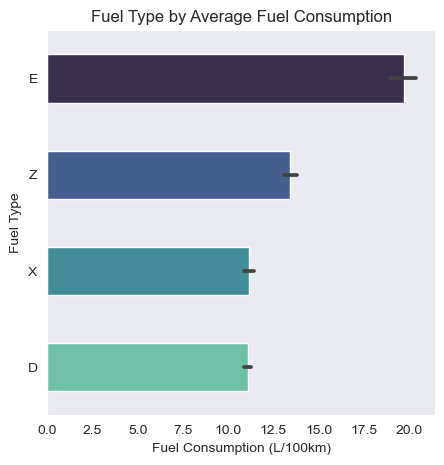

In [27]:
count_data = df.groupby('fuel_type').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='fuel_type', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 5))
sns.set_style("dark")
custom_palette = sns.color_palette('mako', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='fuel_type',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.fuel_type,
    width=0.5
)
plt.ylabel('Fuel Type')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Fuel Type by Average Fuel Consumption')
plt.show()

Fuel type translation:

In [28]:
popped_row.loc[847:851, 'make']

847    X = regular gasoline
848    Z = premium gasoline
849              D = diesel
850       E = ethanol (E85)
851         N = natural gas
Name: make, dtype: object

Ethanol-fueled vehicles consume a lot more fuel than the rest. This is because ethanol has lower energy content per gallon than gasoline and other fuels. E85 also burns faster than regular gasoline because it vaporizes faster.

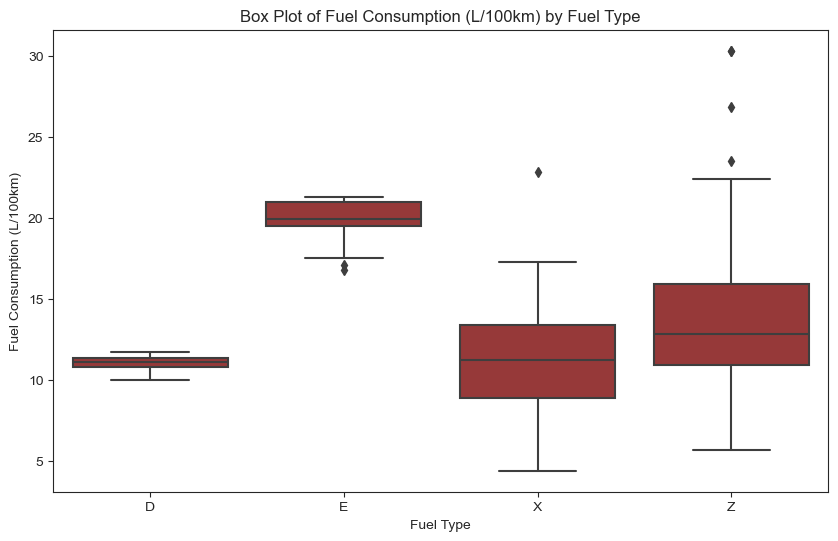

In [29]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.boxplot(
    x='fuel_type', y='fuel_consumption_(l/100km)', data=df, color='brown'
)

plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100km)')
plt.title('Box Plot of Fuel Consumption (L/100km) by Fuel Type')

plt.show()

In [30]:
groups = [df['fuel_consumption_(l/100km)'][df['fuel_type'] == category] for category in df['fuel_type'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

F-statistic: 64.79162060886138
P-value: 1.2149988241015007e-37
There is a significant difference between the categories.


On average, ethanol-fueled vehicles consume more fuel than others. This is confirmed in the box plot and the ANOVA, which confirms the hypothesis that there is an association between fuel type and fuel consumption. 

For other fuels, premium gasoline burns more than regular gasoline and the cars with the highest fuel efficiency as diesel-engine cars. 

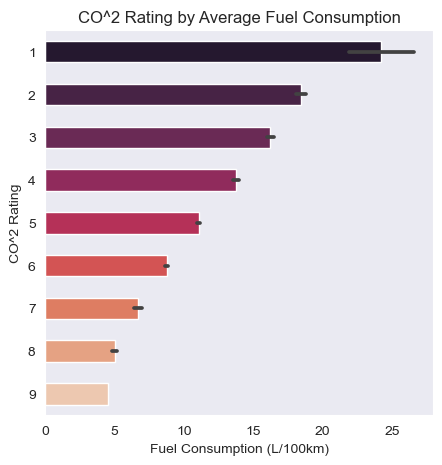

In [31]:
count_data = df.groupby('co2_rating').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='co2_rating', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 5))
sns.set_style("dark")
custom_palette = sns.color_palette('rocket', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='co2_rating',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.co2_rating,
    width=0.5
)
plt.ylabel('CO^2 Rating')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('CO^2 Rating by Average Fuel Consumption')
plt.show()

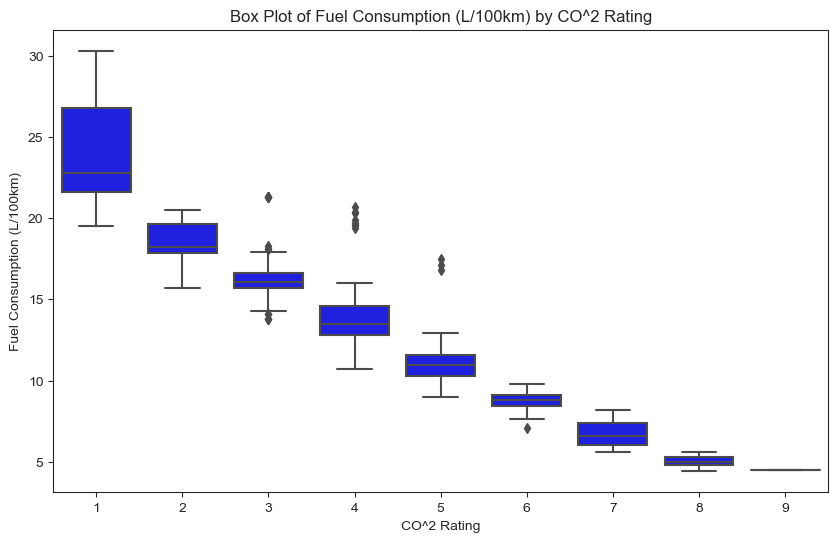

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.boxplot(
    x='co2_rating', y='fuel_consumption_(l/100km)', data=df, color='blue'
)

plt.xlabel('CO^2 Rating')
plt.ylabel('Fuel Consumption (L/100km)')
plt.title('Box Plot of Fuel Consumption (L/100km) by CO^2 Rating')

plt.show()

In [33]:
groups = [df['fuel_consumption_(l/100km)'][df['co2_rating'] == category] for category in df['co2_rating'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

F-statistic: 629.8299723527753
P-value: 0.0
There is a significant difference between the categories.


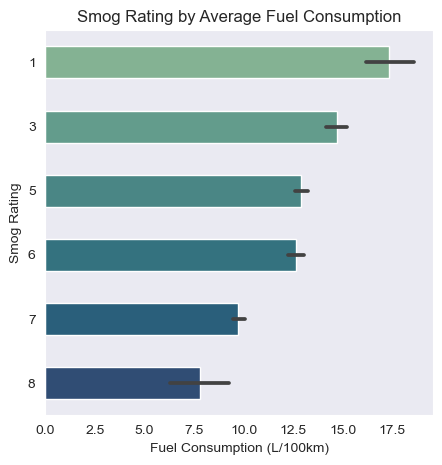

In [34]:
count_data = df.groupby('smog_rating').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='smog_rating', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 5))
sns.set_style("dark")
custom_palette = sns.color_palette('crest', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='smog_rating',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.smog_rating,
    width=0.5
)
plt.ylabel('Smog Rating')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Smog Rating by Average Fuel Consumption')
plt.show()

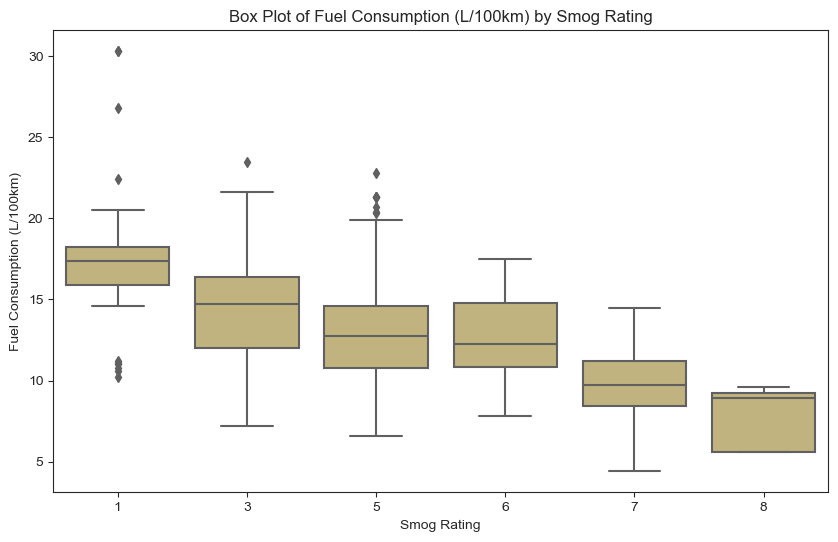

In [35]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.boxplot(
    x='smog_rating', y='fuel_consumption_(l/100km)', data=df, color=deep_colors[4]
)

plt.xlabel('Smog Rating')
plt.ylabel('Fuel Consumption (L/100km)')
plt.title('Box Plot of Fuel Consumption (L/100km) by Smog Rating')

plt.show()

In [36]:
groups = [df['fuel_consumption_(l/100km)'][df['smog_rating'] == category] for category in df['smog_rating'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

F-statistic: 95.53613626233602
P-value: 1.8999396759824358e-79
There is a significant difference between the categories.


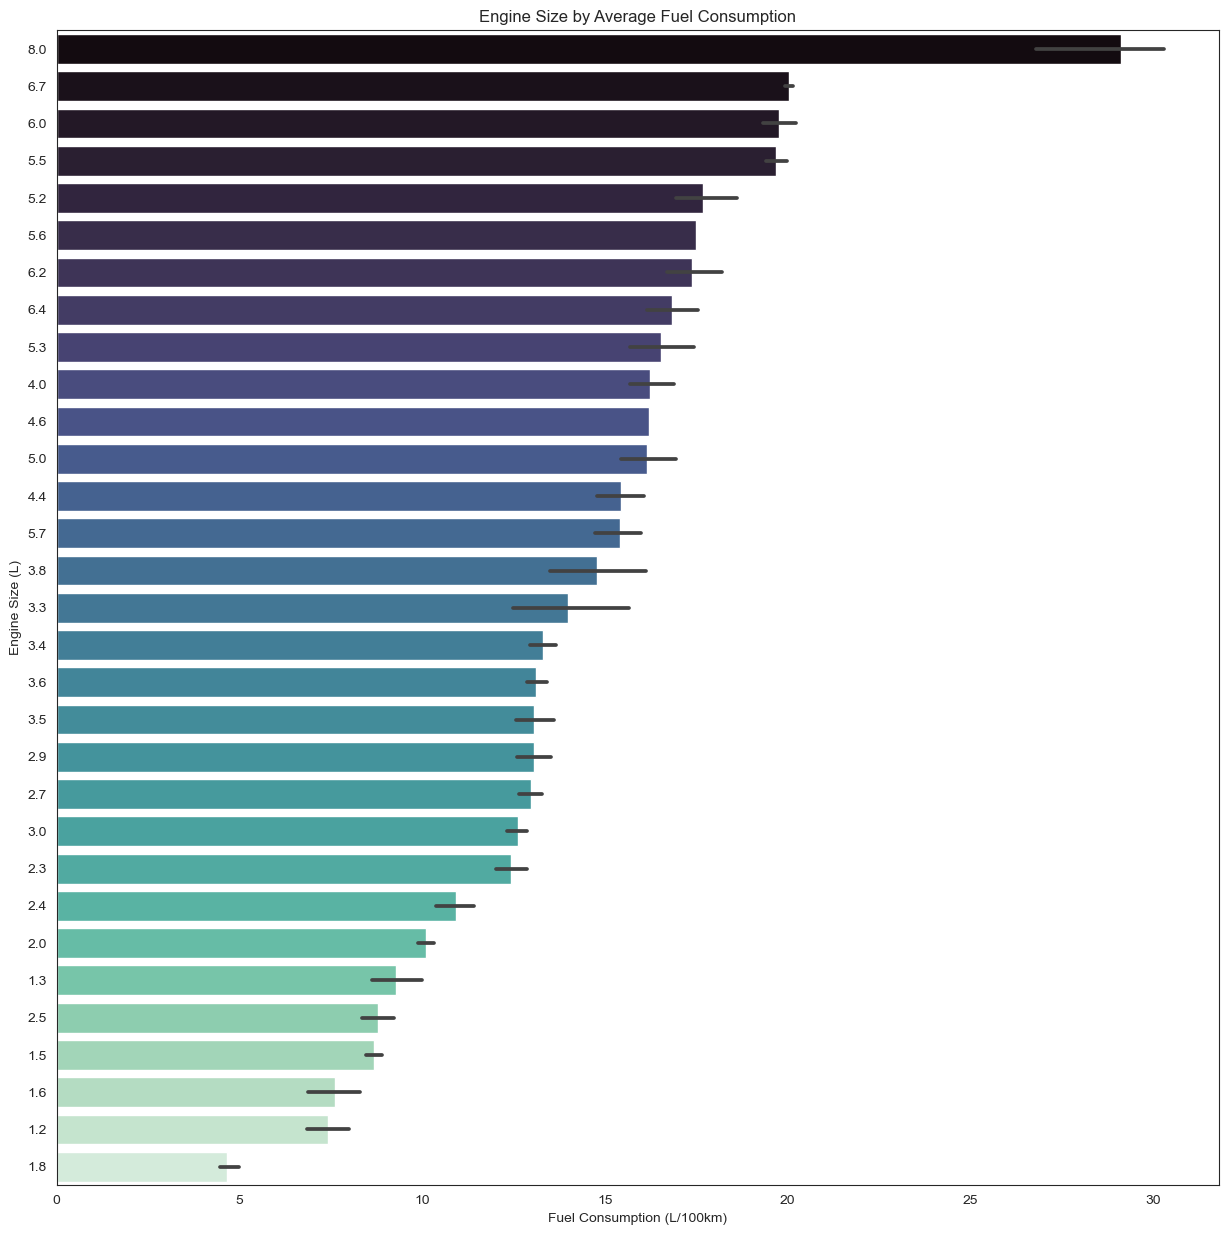

In [37]:
count_data = df.groupby('engine_size_(l)').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='engine_size_(l)', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(15, 15))
sns.set_style("white")
custom_palette = sns.color_palette('mako', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df, y='engine_size_(l)',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data['engine_size_(l)'],
)
plt.ylabel('Engine Size (L)')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Engine Size by Average Fuel Consumption')
plt.show()

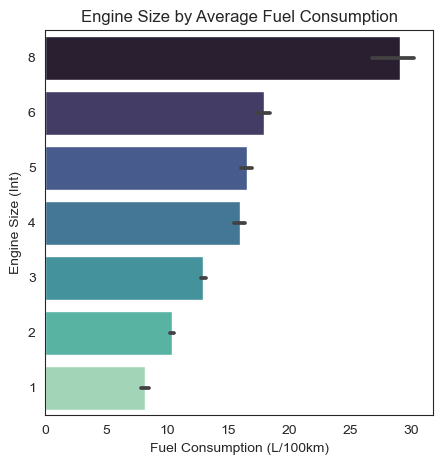

In [38]:
count_data = df.assign(
    engine_size_int=lambda x: x['engine_size_(l)'].astype(int)).groupby('engine_size_int').agg(
    {'fuel_consumption_(l/100km)':np.mean}
).sort_values(by='engine_size_int', ascending=False).reset_index().sort_values(
    by='fuel_consumption_(l/100km)', ascending=False
)
num_bars = len(count_data)

plt.figure(figsize=(5, 5))
sns.set_style("white")
custom_palette = sns.color_palette('mako', n_colors=num_bars)
sns.set_palette(custom_palette)
sns.barplot(
    data=df.assign(
        engine_size_int=lambda x: x['engine_size_(l)'].astype(int)), 
    y='engine_size_int',
    x='fuel_consumption_(l/100km)',
    orient='h',
    order=count_data.engine_size_int,
)
plt.ylabel('Engine Size (Int)')
plt.xlabel('Fuel Consumption (L/100km)')
plt.title('Engine Size by Average Fuel Consumption')
plt.show()

In [39]:
groups = [df['fuel_consumption_(l/100km)'][df['engine_size_(l)'] == category] for category in df['engine_size_(l)'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

F-statistic: 106.13838384866185
P-value: 1.0134773779474862e-255
There is a significant difference between the categories.


This feature can also be plot as a numeric variable:

<Figure size 800x600 with 0 Axes>

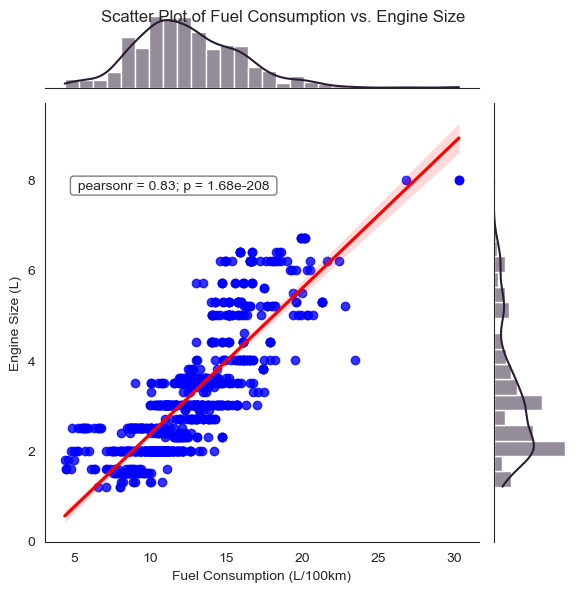

In [54]:
pearson, p = stats.pearsonr(
    df['fuel_consumption_(l/100km)'],
    df['engine_size_(l)']
)
pearson = round(pearson, 2)
p = '{:.2e}'.format(p)

plt.figure(figsize=(8, 6))
sns.jointplot(
    x='fuel_consumption_(l/100km)',
    y='engine_size_(l)', data=df, kind="reg",
    joint_kws={'color':'blue'},
    line_kws={'color':'red'}
).ax_joint.text(
    s=f' pearsonr = {pearson}; p = {p} ',
    ha='left', va='top', x=5, y=8,
    bbox={
        'boxstyle':'round','pad':0.25,'facecolor':'white','edgecolor':'gray'
    }
)

plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Engine Size (L)')
plt.suptitle('Scatter Plot of Fuel Consumption vs. Engine Size')

plt.show()

**Numeric Variables & Fuel Consumption**

There is a near perfect correlation between fuel consumption and combined fuel economy. We can therefore infer that any hypothesis confirmed using fuel consumption will be duplicated when using `combined fuel economy`.

<Figure size 800x600 with 0 Axes>

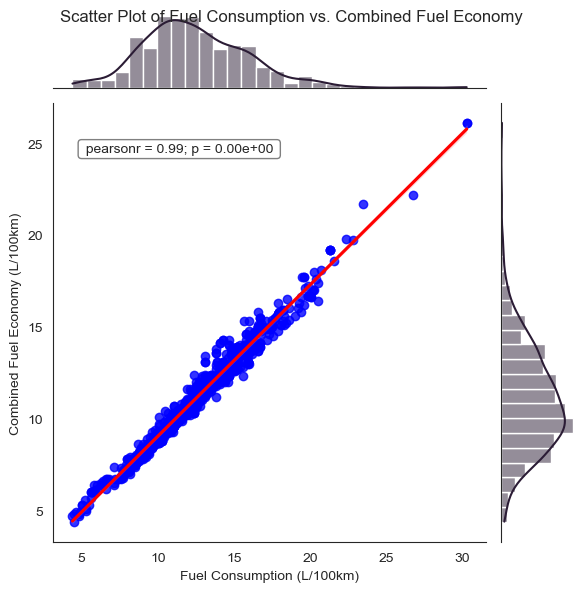

In [40]:
pearson, p = stats.pearsonr(
    df['fuel_consumption_(l/100km)'], 
    df['comb_(l/100_km)']
)
pearson = round(pearson, 2)
p = '{:.2e}'.format(p)

plt.figure(figsize=(8, 6))
sns.jointplot(
    x='fuel_consumption_(l/100km)', 
    y='comb_(l/100_km)', data=df, kind="reg", 
    joint_kws={'color':'blue'},
    line_kws={'color':'red'}
).ax_joint.text(
    s=f' pearsonr = {pearson}; p = {p} ', ha='left', va='top', x=5, y=25,
    bbox={'boxstyle':'round','pad':0.25,'facecolor':'white','edgecolor':'gray'})

plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Combined Fuel Economy (L/100km)')
plt.suptitle('Scatter Plot of Fuel Consumption vs. Combined Fuel Economy')

plt.show()

The correlation between highway and fuel consumption is not as perfect as fuel economy but it's still very high. When we review the regplot, we see that the values are less compressed around the line.

<Figure size 800x600 with 0 Axes>

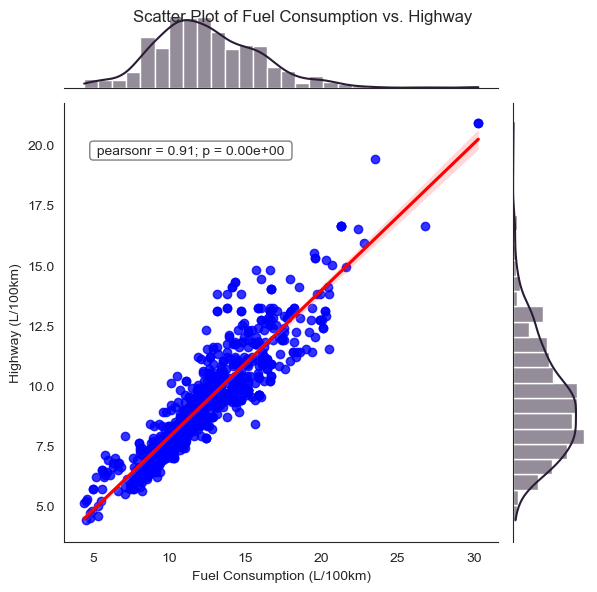

In [41]:
pearson, p = stats.pearsonr(
    df['fuel_consumption_(l/100km)'],
    df['hwy_(l/100_km)']
)
pearson = round(pearson, 2)
p = '{:.2e}'.format(p)

plt.figure(figsize=(8, 6))
sns.jointplot(
    x='fuel_consumption_(l/100km)',
    y='hwy_(l/100_km)', data=df, kind="reg",
    joint_kws={'color':'blue'},
    line_kws={'color':'red'}
).ax_joint.text(
    s=f' pearsonr = {pearson}; p = {p} ',
    ha='left', va='top', x=5, y=20,
    bbox={
        'boxstyle':'round','pad':0.25,'facecolor':'white','edgecolor':'gray'
    }
)

plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Highway (L/100km)')
plt.suptitle('Scatter Plot of Fuel Consumption vs. Highway')

plt.show()

<Figure size 800x600 with 0 Axes>

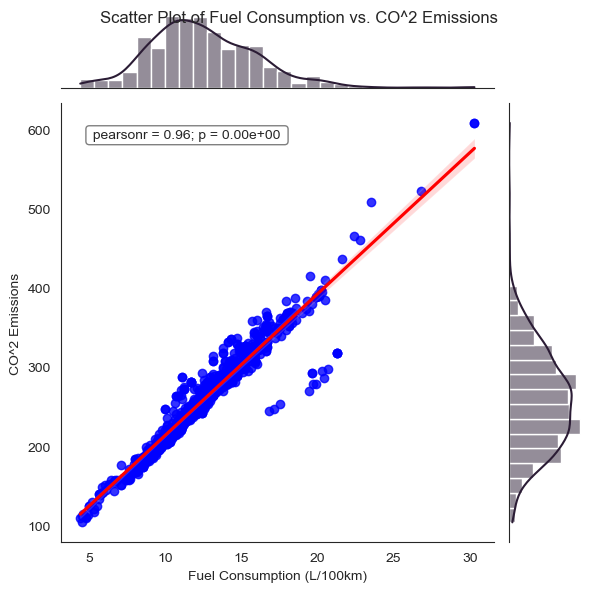

In [42]:
pearson, p = stats.pearsonr(
    df['fuel_consumption_(l/100km)'],
    df['co2_emissions_(g/km)']
)
pearson = round(pearson, 2)
p = '{:.2e}'.format(p)

plt.figure(figsize=(8, 6))
sns.jointplot(
    x='fuel_consumption_(l/100km)',
    y='co2_emissions_(g/km)', data=df, kind="reg",
    joint_kws={'color':'blue'},
    line_kws={'color':'red'}
).ax_joint.text(
    s=f' pearsonr = {pearson}; p = {p} ',
    ha='left', va='top', x=5, y=600,
    bbox={
        'boxstyle':'round','pad':0.25,'facecolor':'white','edgecolor':'gray'
    }
)

plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('CO^2 Emissions')
plt.suptitle('Scatter Plot of Fuel Consumption vs. CO^2 Emissions')

plt.show()

All numerica variables are highly and positively correlated.

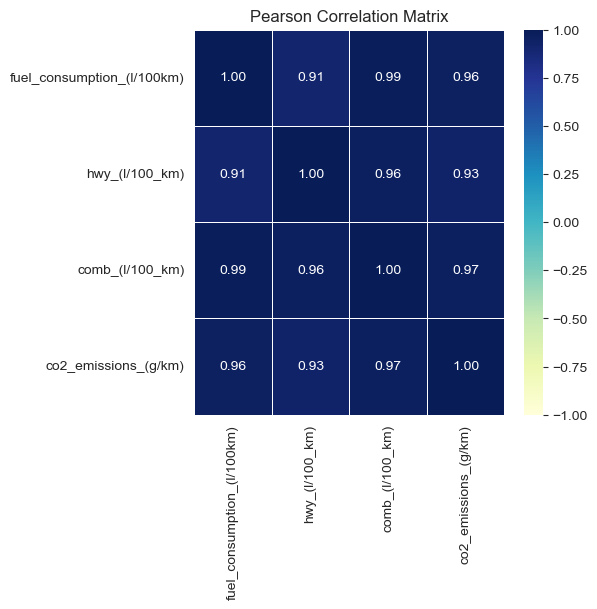

In [43]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    df[['fuel_consumption_(l/100km)', 'hwy_(l/100_km)', 'comb_(l/100_km)', 'co2_emissions_(g/km)']].corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    center=0,
    vmin=-1,
    vmax=1,
    fmt= ".2f",
    cmap="YlGnBu")
plt.title('Pearson Correlation Matrix');

### Regression Model

We'll build a regression model using categorical variables to model the linear relationship between these variables and fuel consumption.

With the high correlation between the numeric variables, we can expect to see similar results across all numeric variables. 

In [44]:
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_cols.remove('model')

cat_cols

['make',
 'vehicle_class',
 'transmission',
 'fuel_type',
 'co2_rating',
 'smog_rating']

In [58]:
data = df.assign(
    engine_size_int=lambda x: x['engine_size_(l)'].astype(int))[cat_cols + ['fuel_consumption_(l/100km)', 'engine_size_(l)', 'engine_size_int']].copy().rename(
    columns={
        'fuel_consumption_(l/100km)': 'fuel_consumption', 
        'engine_size_(l)':'engine_size'
             }
)
formula = 'fuel_consumption ~ make + vehicle_class + transmission + fuel_type + smog_rating + co2_rating + engine_size'
model = smf.ols(formula, data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       fuel_consumption   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     254.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:18:21   Log-Likelihood:                -772.80
No. Observations:                 833   AIC:                             1728.
Df Residuals:                     742   BIC:                             2158.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

This model explains a significant amount of the variance in fuel consumption (96.9%). Upon examination, many parameters are statistically insignificant in arriving at the r-squared value. The significant values are:
* make[Bentley, Bugatti, Lincoln, Maserati, Rolls Royce]
* vehicle class [Standard Pickup Truck, Small SUV]
* transmission [A9, AS10, M6]
* All Fuel types
* Smog Rating [6, 7, 8]
* All Carbon Dioxide Ratings
* Engine Size

CO^2 emissions are highly correlated with fuel consumption. When we rebuild the model without co2 ratings, we are still able to explain 89.8% of the variance in fuel consumption.:

In [59]:
data = df.assign(
    engine_size_int=lambda x: x['engine_size_(l)'].astype(int))[cat_cols + ['fuel_consumption_(l/100km)', 'engine_size_(l)', 'engine_size_int']].copy().rename(
    columns={
        'fuel_consumption_(l/100km)': 'fuel_consumption',
        'engine_size_(l)':'engine_size'
    }
)
formula = 'fuel_consumption ~ make + vehicle_class + transmission + fuel_type + smog_rating + engine_size'
model = smf.ols(formula, data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       fuel_consumption   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     80.21
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          7.70e-318
Time:                        18:18:31   Log-Likelihood:                -1265.2
No. Observations:                 833   AIC:                             2696.
Df Residuals:                     750   BIC:                             3089.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Conclusion
For 2023 cars, fuel efficiency is determined from the following features:
* make
* vehicle class
* transmission
* fuel type
* smog rating, and 
* engine size.

Two-seater cars and luxury vehicle brands have lower fuel efficiency. For non-luxury brands, car make is irrelevant to fuel efficiency.

Vehicle class is relevant to fuel efficiency where the class is a pickup truck or a small SUV. Other classes are irrelevant to fuel efficiency.

All fuel types are relevant to fuel efficiency. However, ethanol, which is the least fuel efficient, is the cleanest fuel. The burn rate and properties of ethanol should be considered in determining fuel efficiency standards.

The highest smog ratings (6–8) are relevant to fuel efficiency. All lower ratings have the same significance as 0.

In essence, for most cars, determining fuel efficiency requires considering the car brand to confirm it's not a luxury brand, checking the type of fuel used by the engine and considering the smog rating.